In [1]:
!unzip '/content/drive/MyDrive/Training/299 Malaria/malaria.zip'

Streaming output truncated to the last 5000 lines.
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: malaria/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: malaria/Uninfe

In [2]:
import os

In [3]:
len(os.listdir('/content/malaria/Parasitized')), \
len(os.listdir('/content/malaria/Uninfected'))

(13780, 13780)

In [4]:
import os
os.makedirs('/content/drive/MyDrive/Training/299 Malaria/Dataset_VGG1')
!cp -r '/content/malaria/Parasitized' -d '/content/drive/MyDrive/Training/299 Malaria/Dataset_VGG1'
!cp -r '/content/malaria/Uninfected' -d '/content/drive/MyDrive/Training/299 Malaria/Dataset_VGG1'

In [5]:
!pip install split-folders

In [12]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Training/299 Malaria/Dataset_VGG1', output="splitted_data", seed=1337, ratio=(.7, 0.2,0.1)) 

Copying files: 27560 files [01:45, 262.32 files/s]


In [13]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/Training/299 Malaria'

Streaming output truncated to the last 5000 lines.
  adding: content/splitted_data/val/Uninfected/C39P4thinF_original_IMG_20150622_105253_cell_61.png (stored 0%)
  adding: content/splitted_data/val/Uninfected/C48P9thinF_IMG_20150721_161055_cell_23.png (stored 0%)
  adding: content/splitted_data/val/Uninfected/C232ThinF_IMG_20151112_154211_cell_71.png (stored 0%)
  adding: content/splitted_data/val/Uninfected/C71P32_ThinF_IMG_20150813_161634_cell_128.png (stored 0%)
  adding: content/splitted_data/val/Uninfected/C168P129ThinF_IMG_20151118_154126_cell_106.png (stored 0%)
  adding: content/splitted_data/val/Uninfected/C78P39ThinF_IMG_20150606_104106_cell_45.png (stored 0%)
  adding: content/splitted_data/val/Uninfected/C87P48ThinF_IMG_20150820_132514_cell_13.png (stored 0%)
  adding: content/splitted_data/val/Uninfected/C78P39ThinF_IMG_20150606_103630_cell_37.png (stored 0%)
  adding: content/splitted_data/val/Uninfected/C181P142ThinF_IMG_20151127_160539_cell_34.png (stored 0%)
  adding: 

In [14]:
!cp '/content/drive/MyDrive/Training/299 Malaria/splitted_data.zip' -d '/content'
!unzip '/content/splitted_data.zip'

Streaming output truncated to the last 5000 lines.
 extracting: content/splitted_data/val/Uninfected/C39P4thinF_original_IMG_20150622_105253_cell_61.png  
 extracting: content/splitted_data/val/Uninfected/C48P9thinF_IMG_20150721_161055_cell_23.png  
 extracting: content/splitted_data/val/Uninfected/C232ThinF_IMG_20151112_154211_cell_71.png  
 extracting: content/splitted_data/val/Uninfected/C71P32_ThinF_IMG_20150813_161634_cell_128.png  
 extracting: content/splitted_data/val/Uninfected/C168P129ThinF_IMG_20151118_154126_cell_106.png  
 extracting: content/splitted_data/val/Uninfected/C78P39ThinF_IMG_20150606_104106_cell_45.png  
 extracting: content/splitted_data/val/Uninfected/C87P48ThinF_IMG_20150820_132514_cell_13.png  
 extracting: content/splitted_data/val/Uninfected/C78P39ThinF_IMG_20150606_103630_cell_37.png  
 extracting: content/splitted_data/val/Uninfected/C181P142ThinF_IMG_20151127_160539_cell_34.png  
 extracting: content/splitted_data/val/Uninfected/C93P54ThinF_IMG_2015082

In [15]:
!pip install scikit-plot

In [16]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization,Activation
from tensorflow.keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

import glob,os

In [21]:
data_aug_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    # rotation_range=15,
    # shear_range=0.2,
    # zoom_range=0.25,
   )

In [22]:
data_aug_valid = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [23]:
train=data_aug_train.flow_from_directory(directory='/content/splitted_data/train',
                                         target_size=(128,128),
                                         color_mode='rgb',
                                         classes=['Parasitized','Uninfected'],
                                         shuffle=True,
                                         class_mode='binary', 
                                         batch_size=64)

Found 20299 images belonging to 2 classes.


In [24]:
valid=data_aug_valid.flow_from_directory(directory='/content/splitted_data/val',
                                         target_size=(128,128),
                                         color_mode='rgb',
                                         classes=['Parasitized','Uninfected'],
                                         shuffle=False,
                                         class_mode='binary', 
                                         batch_size=64)

Found 6266 images belonging to 2 classes.


In [25]:
from tensorflow.keras.applications.vgg19 import VGG19

In [26]:
p_model = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3)
)
p_model.trainable=True

80150528/80134624 [==============================] - 1s 0us/step


In [27]:
p_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [28]:
model = Sequential()

model.add(BatchNormalization(input_shape=(128, 128, 3)))
model.add(p_model)
model.add(Flatten())
# finalize with standard Dense, Dropout...
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [30]:
from tensorflow.keras.optimizers import Adam,RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
modelPath = '/content/drive/MyDrive/Training/299 Malaria/saved_models_VGG_19/Pretrained VGG19'
if not os.path.exists(modelPath):
  os.makedirs(modelPath)
  print('Model Directory Created')
else:
  print('Model Directory Already Exists')
checkpoint = ModelCheckpoint(modelPath, monitor='val_accuracy', verbose=1, save_best_only=True)

Model Directory Created


In [32]:
history = model.fit( 
      train,
      validation_data = valid, 
      validation_steps = len(valid), 
      shuffle = True,    
      steps_per_epoch = len(train),     
      epochs = 10,
      callbacks=[checkpoint],  
      verbose = 1) 

Epoch 1/10
318/318 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.9157
Epoch 00001: val_accuracy improved from -inf to 0.95771, saving model to /content/drive/MyDrive/Training/299 Malaria/saved_models_VGG_19/Pretrained VGG19
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Training/299 Malaria/saved_models_VGG_19/Pretrained VGG19/assets
318/318 [==============================] - 257s 735ms/step - loss: 0.2226 - accuracy: 0.9157 - val_loss: 0.1264 - val_accuracy: 0.9577
Epoch 2/10
318/318 [==============================] - ETA: 0s - loss: 0.1539 - accuracy: 0.9493
Epoch 00002: val_accuracy did not improve from 0.95771
318/318 [==============================] - 217s 682ms/step - loss: 0.1539 - accuracy: 0.9493 - val_loss: 0.1180 - val_accuracy: 0.9560
Epoch 3/10
318/318 [==============================] - ETA: 0s - loss: 0.1435 - accuracy: 0.9504
Epoch 00003: val_accuracy improved from 0.95771 to 0.96058, saving model to /content/drive/MyDrive/Training/29

In [35]:
import pickle
with open('/content/drive/MyDrive/Training/299 Malaria/saved_models_VGG_19/Pretrained VGG19/saved_model.pb', 'wb') as file_pi:
  pickle.dump(history.history, file_pi)

In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    #auc = history['auc']
    #val_auc = history['accuracy']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(18, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc',marker = 'p',color='green')
    plt.plot(x,val_acc, 'r', label='Validation acc',marker = 'p',color='red')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right' )
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, label='Training loss',marker = 'p',color='green')
    plt.plot(x, val_loss, label='Validation loss',marker = 'p',color='red')
    plt.title('Training and Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('curve.jpg',dpi=600)
    #plt.subplot(1, 3, 3)
    #plt.plot(x, auc, 'b', label='Training loss',marker = 'p',color='green')
    #plt.plot(x, val_auc, 'r', label='Validation loss',marker = 'p',color='red')
    #plt.title('Training and Validation AUC')
    #plt.xlabel('Epoch')
    #plt.ylabel('AUC')
    #plt.legend()
    #plt.savefig('curve.jpg',dpi=600)

# plot_history(modelHistory.history)

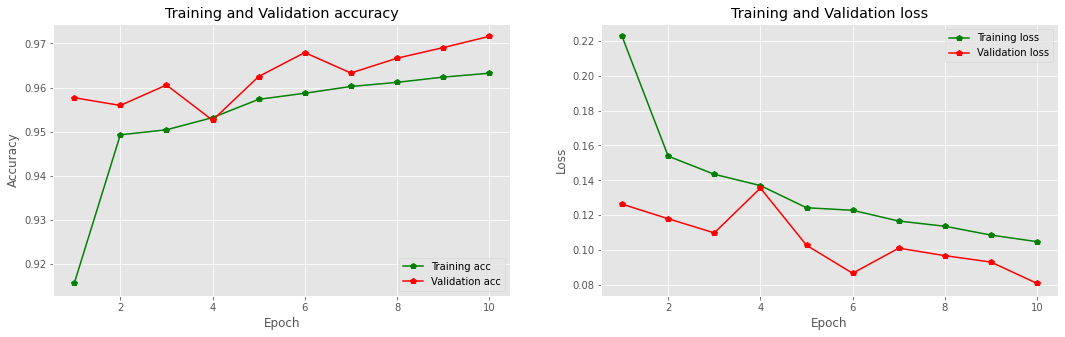

In [37]:
import pickle
with open('/content/drive/MyDrive/Training/299 Malaria/saved_models_VGG_19/Pretrained VGG19/saved_model.pb', 'rb') as file_pi:
  dct=pickle.load(file_pi)

plot_history(dct)